In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
parent_path = str(Path().joinpath('..\..\..\..').resolve())
sys.path.append(parent_path)

In [3]:
from triple_agent.parsing.replay.get_parsed_replays import get_parsed_replays
from triple_agent.classes.outcomes import WinType
from triple_agent.classes.timeline import TimelineCategory
from triple_agent.classes.roles import Roles
from triple_agent.reports.generation.generic_query import query
from triple_agent.reports.generation.plot_specs import AxisProperties, DataQueryProperties, PlotLabelStyle
from collections import Counter
import itertools
from pprint import pprint

In [4]:
all_replays = get_parsed_replays(lambda game: game.event == 'Summer Cup 2019' and game.division != 'Tournament')
print(len(all_replays))

1037


# Gold Spot Awards: Groups Only    

### 🏆 **The Rush Award** for fastest completion of missions    

In [5]:
fastest_time = None
fastest_game = None
    
def rush_award(games, data_dictionary):
    global fastest_time
    global fastest_game
    
    for game in games:
        if game.win_type == WinType.MissionsWin:
            for event in game.timeline:
                if event.category & TimelineCategory.GameEnd:
                    this_duration = event.elapsed_time

            data_exists = data_dictionary.get(game.spy, None)
            if data_exists is None:
                data_dictionary[game.spy] = this_duration
            else:
                data_dictionary[game.spy] = min(data_dictionary[game.spy], this_duration)
                
            if fastest_time is None or this_duration < fastest_time:
                fastest_time = this_duration
                fastest_game = game

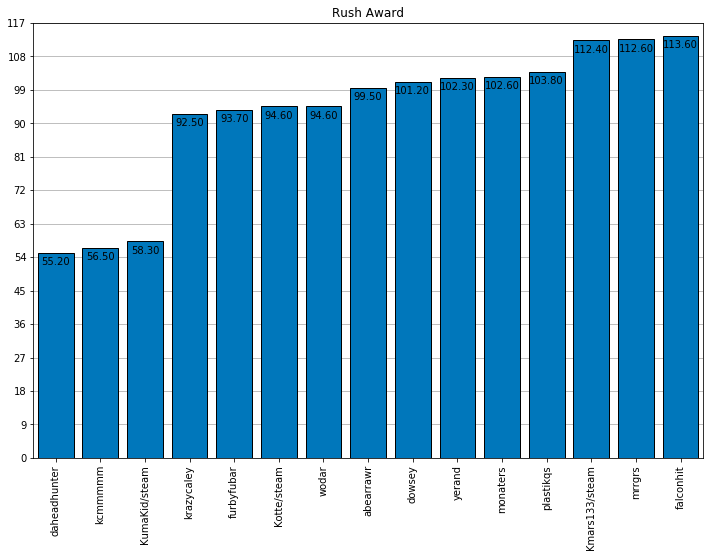

daheadhunter completed missions on Venue.Courtyard against iggythegrifter in 55.2 seconds


In [6]:
query(all_replays, DataQueryProperties(query_function=rush_award, primary_order=sum, limit=15), AxisProperties(title="Rush Award",force_bar=True, data_label_style=PlotLabelStyle.Plain))
print(f'{fastest_game.spy} completed missions on {fastest_game.venue} against {fastest_game.sniper} in {fastest_time:0.1f} seconds')

### 🏆 **The Assassin Award** for fastest termination of the spy    

In [7]:
fastest_time = None
fastest_game = None
    
def assassin_award(games, data_dictionary):
    global fastest_time
    global fastest_game
    
    for game in games:
        if game.win_type == WinType.SpyShot:
            for event in game.timeline:
                if event.category & TimelineCategory.GameEnd:
                    this_duration = event.elapsed_time

            data_exists = data_dictionary.get(game.sniper, None)
            if data_exists is None:
                data_dictionary[game.sniper] = this_duration
            else:
                data_dictionary[game.sniper] = min(data_dictionary[game.sniper], this_duration)
                
            if fastest_time is None or this_duration < fastest_time:
                fastest_time = this_duration
                fastest_game = game

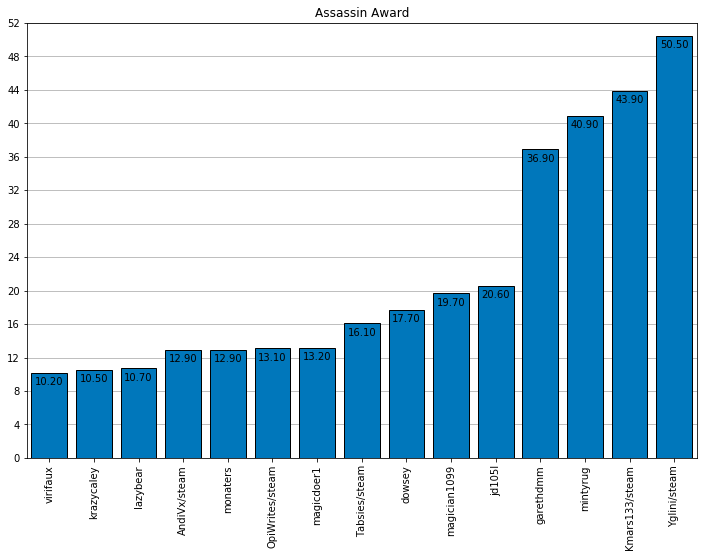

virifaux shot Harren/steam on Venue.HighRise in 10.2 seconds


In [8]:
query(all_replays, DataQueryProperties(query_function=assassin_award, primary_order=sum, limit=15), AxisProperties(title="Assassin Award",force_bar=True, data_label_style=PlotLabelStyle.Plain))
print(f'{fastest_game.sniper} shot {fastest_game.spy} on {fastest_game.venue} in {fastest_time:0.1f} seconds')

### 🏆 **The Invisible Man Award** for most lowlights achieved as spy    
*Spy doesn't have to win but must be lowlit and alive at the conclusion of the game*    

In [9]:
def invisible_man_award(games, data_dictionary):
    for game in games:
        if game.win_type != WinType.SpyShot:
            last_light = None
            for event in game.timeline:
                if event.category & TimelineCategory.SniperLights and Roles.Spy in event.role:
                    if 'less' in event.event:
                        last_light = 'low'
                    elif 'neutral' in event.event:
                        last_light = 'neutral'
                    else:
                        last_light = 'high'
                        
            if last_light == 'low':
                data_dictionary[game.spy] += 1

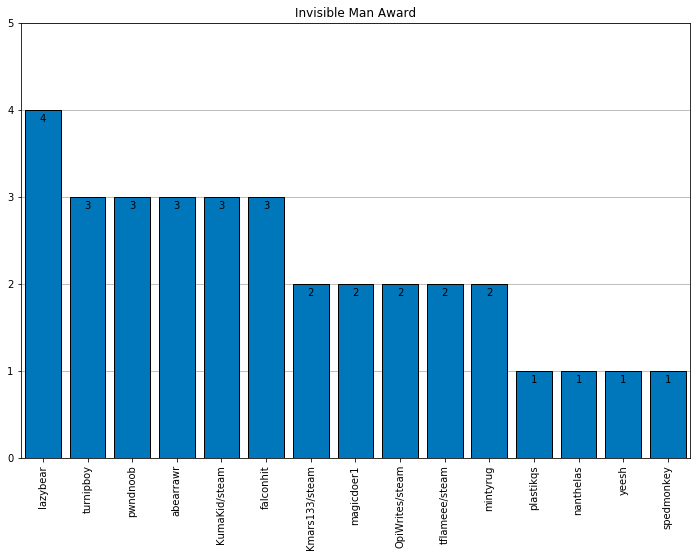

DataPlotProperties(frame=     lazybear  turnipboy  pwndnoob  abearrawr  KumaKid/steam  falconhit  \
NaN         4          3         3          3              3          3   

     Kmars133/steam  magicdoer1  OpiWrites/steam  tflameee/steam  mintyrug  \
NaN               2           2                2               2         2   

     plastikqs  nanthelas  yeesh  spedmonkey  
NaN          1          1      1           1  , stacks_are_categories=True)

In [10]:
query(
    all_replays,
    DataQueryProperties(query_function=invisible_man_award, primary_order=sum, reverse_primary_order=True, limit=15),
    AxisProperties(title="Invisible Man Award",force_bar=True, data_label_style=PlotLabelStyle.Plain)
)

# Tin Spot Awards: Groups Only    

### 🏆 **The Down to the Wire Award** for longest OT spy win    

In [11]:
longest_ot = None
longest_ot_game = None
    
def down_to_the_wire_award(games, data_dictionary):
    global longest_ot
    global longest_ot_game
    
    for game in games:
        if game.win_type & WinType.SpyWin:
            overtime_start = None
            for event in game.timeline:
                if event.category & TimelineCategory.Overtime:
                    overtime_start = event.elapsed_time
                
                if event.category & TimelineCategory.GameEnd and overtime_start is not None:
                    total_ot_time = event.elapsed_time - overtime_start
                    
                    if longest_ot is None or total_ot_time > longest_ot:
                        longest_ot = total_ot_time
                        longest_ot_game = game

                    data_exists = data_dictionary.get(game.spy, None)
                    
                    if data_exists is None:
                        data_dictionary[game.spy] = total_ot_time
                    else:
                        data_dictionary[game.spy] = max(data_dictionary[game.spy], total_ot_time)

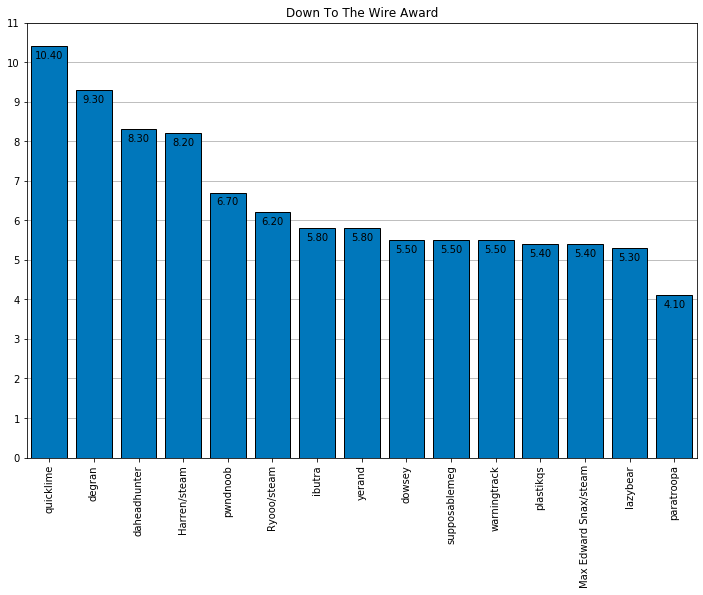

quicklime survived overtime for 10.4 seconds on Venue.Courtyard against turnipboy


In [12]:
query(
    all_replays,
    DataQueryProperties(query_function=down_to_the_wire_award, primary_order=sum, reverse_primary_order=True, limit=15),
    AxisProperties(title="Down To The Wire Award",force_bar=True, data_label_style=PlotLabelStyle.Plain)
)
print(f'{longest_ot_game.spy} survived overtime for {longest_ot:0.1f} seconds on {longest_ot_game.venue} against {longest_ot_game.sniper}')

### 🏆 **The Friendly Fire Award** for most civilian casualties    

In [13]:
def friendly_fire_award(games, data_dictionary):  
    for game in games:
        if game.win_type == WinType.CivilianShot:
            data_dictionary[game.sniper] += 1

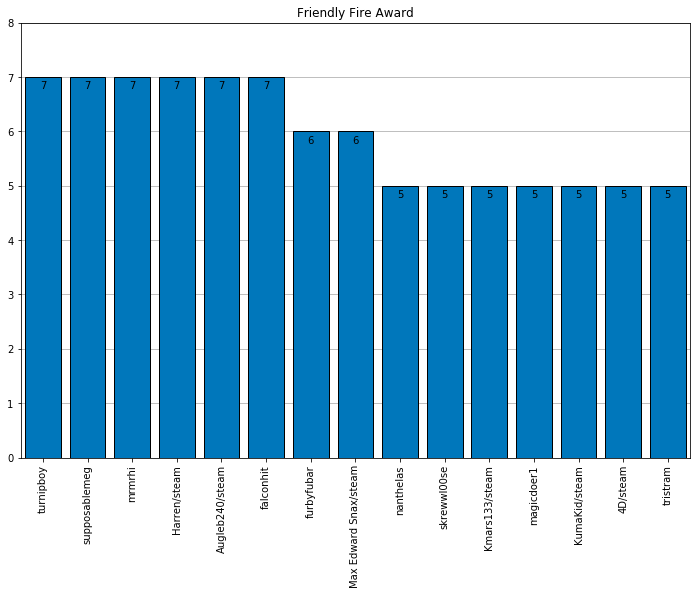

DataPlotProperties(frame=     turnipboy  supposablemeg  mrmrhi  Harren/steam  Augleb240/steam  \
NaN          7              7       7             7                7   

     falconhit  furbyfubar  Max Edward Snax/steam  nanthelas  skrewwl00se  \
NaN          7           6                      6          5            5   

     Kmars133/steam  magicdoer1  KumaKid/steam  4D/steam  tristram  
NaN               5           5              5         5         5  , stacks_are_categories=True)

In [14]:
query(
    all_replays,
    DataQueryProperties(query_function=friendly_fire_award, primary_order=sum, reverse_primary_order=True, limit=15),
    AxisProperties(title="Friendly Fire Award",force_bar=True, data_label_style=PlotLabelStyle.Plain)
)

### 🏆 **The Johnny English Award** for most blows of cover    
*Cover blows include coughing, statue clank and drink drops*    

In [15]:
def johnny_english_award(games, data_dictionary):
    for game in games:
        for event in game.timeline:
            if event.event in [
                #clank
                "dropped statue.",
                #cough
                "banana bread aborted.", "action test red: contact double agent",
                #crash
                "purloin guest list aborted."
            ]:
                data_dictionary[game.spy] += 1

In [16]:
def johnny_english_award_v2(games, data_dictionary):
    for game in games:
        for event in game.timeline:
            if event.event in [
                #clank
                "dropped statue.",
                #cough
                "banana bread aborted.", "action test red: contact double agent",
                #crash
                "purloin guest list aborted.",
                #red watch check
                "action test red: check watch", "aborted watch check to add time."
            ]:
                data_dictionary[game.spy] += 1

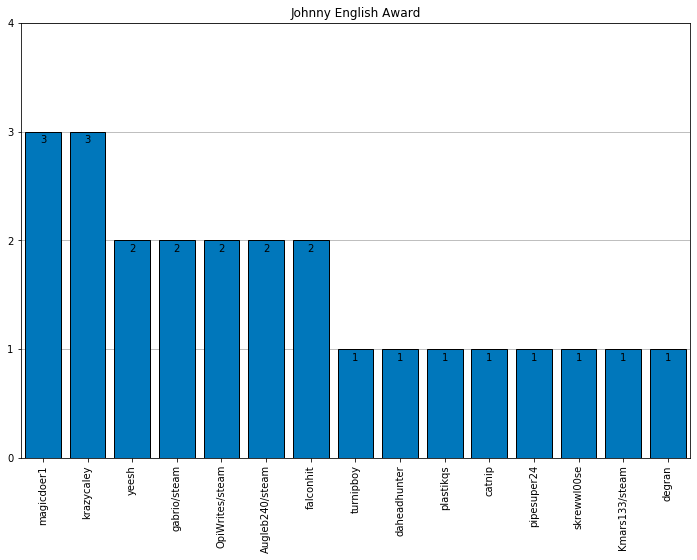

DataPlotProperties(frame=     magicdoer1  krazycaley  yeesh  gabrio/steam  OpiWrites/steam  \
NaN           3           3      2             2                2   

     Augleb240/steam  falconhit  turnipboy  daheadhunter  plastikqs  catnip  \
NaN                2          2          1             1          1       1   

     pipesuper24  skrewwl00se  Kmars133/steam  degran  
NaN            1            1               1       1  , stacks_are_categories=True)

In [17]:
query(
    all_replays,
    DataQueryProperties(query_function=johnny_english_award_v2, primary_order=sum, reverse_primary_order=True, limit=15),
    AxisProperties(title="Johnny English Award",force_bar=True, data_label_style=PlotLabelStyle.Plain)
)